## Sales Analysis Project

It's the end of the year and time to analyze if the business has lived up to its **sales forecast** implemented at the beginning of the year.
A **sales forecast** is an essential tool for managing a business of any size. It is a month-by-month forecast of the level of sales you expect to achieve. 
Most businesses draw up a sales forecast once a year.

With that said, in this project, I will be analyzing the business's yearly sales activities and determine factors such as:

     1.Highest sales turnover, 

     2.Highest sales per city, 

     3.Highest sales per month, 

     4.The product most sold, 

     5.Best time to place advisement.

## Objetive 

 The main objective is to see if the business has lived up to its **sales forecast**, and find areas to propose improvements. 

## Dataset

Dataset consists of 12 month wealth of sales data [Jan-Dec]. Analysis can be done for a single file, and all dataset has been combined into a single file to allow analysis for the whole year.

In [64]:
#import libs

import pandas as pd
pd.options.mode.chained_assignment = None
import os
from itertools import combinations
from collections import Counter
import ipynb.fs
from .full.func_validate import get_month_number, get_month_by_number
import matplotlib.pyplot as plt
import datetime as dt
import matplotlib.dates as mdates

import warnings
warnings.filterwarnings("ignore")

## Merge the dataset

Dataset consists of 12 month wealth of sales data [Jan-Dec]. Analysis can be done for a single file, and all dataset has been combined into a single file to allow analysis for the whole year. 

In [39]:
# https://stackoverflow.com/questions/3207219/how-do-i-list-all-files-of-a-directory
#https://sparkbyexamples.com/pandas/pandas-concat-dataframes-explained/#:~:text=Concat%20Two%20DataFrames-,Use%20pandas.,append%20one%20DataFrame%20with%20another.

PATH ="./Salas_data/"
year_data = 'all_data'

month_number = get_month_number()
months_data = get_month_by_number(month_number)

if months_data != year_data:
    months_data = pd.read_csv(PATH+months_data+".csv")

else:
    files =[file for file in os.listdir(PATH)] # compreensive list

    months_data = pd.DataFrame() # empty list

    for file in files: # for loop
        data = pd.read_csv(PATH+file) # reading the all data
        months_data = pd.concat([months_data, data]) # concat all months data

    months_data.to_csv("year_data.csv", index = False) # create a csv file and save it in the Directory
    
months_data.head()


              'Months Sales Date[select the month or whole year data you're interested on]:'
              '1. January'
              '2. February'
              '3. March'
              '4. April'
              '5. May'
              '6. June'
              '7. July'
              '8. August'
              '9. September'
              '10. October'
              '11. November'
              '12. December'
              '13. all_data' 
              
Select a month or whole year data:13


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,150502,iPhone,1,700,02/18/19 01:35,"866 Spruce St, Portland, ME 04101"
1,150503,AA Batteries (4-pack),1,3.84,02/13/19 07:24,"18 13th St, San Francisco, CA 94016"
2,150504,27in 4K Gaming Monitor,1,389.99,02/18/19 09:46,"52 6th St, New York City, NY 10001"
3,150505,Lightning Charging Cable,1,14.95,02/02/19 16:47,"129 Cherry St, Atlanta, GA 30301"
4,150506,AA Batteries (4-pack),2,3.84,02/28/19 20:32,"548 Lincoln St, Seattle, WA 98101"


## Clean up of the dataset

### Drop rows of NAN

In [40]:
nan_months_data = months_data[months_data.isna().any(axis=1)]
nan_months_data.head()

months_data = months_data.dropna(how='all')
months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,150502,iPhone,1,700,02/18/19 01:35,"866 Spruce St, Portland, ME 04101"
1,150503,AA Batteries (4-pack),1,3.84,02/13/19 07:24,"18 13th St, San Francisco, CA 94016"
2,150504,27in 4K Gaming Monitor,1,389.99,02/18/19 09:46,"52 6th St, New York City, NY 10001"
3,150505,Lightning Charging Cable,1,14.95,02/02/19 16:47,"129 Cherry St, Atlanta, GA 30301"
4,150506,AA Batteries (4-pack),2,3.84,02/28/19 20:32,"548 Lincoln St, Seattle, WA 98101"


### Find 'Or' and delete it -> Eliminating any text format in the Order Date column

In [41]:
months_data = months_data[months_data['Order Date'].str[0:2] != 'Or']

### Correct the columns by changing the type -> changing the below columns to the appropriate format

In [42]:
months_data['Quantity Ordered'] = pd.to_numeric(months_data['Quantity Ordered']) #make int
months_data['Price Each'] = pd.to_numeric(months_data['Price Each']) #make float

months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,150502,iPhone,1,700.00,02/18/19 01:35,"866 Spruce St, Portland, ME 04101"
1,150503,AA Batteries (4-pack),1,3.84,02/13/19 07:24,"18 13th St, San Francisco, CA 94016"
2,150504,27in 4K Gaming Monitor,1,389.99,02/18/19 09:46,"52 6th St, New York City, NY 10001"
3,150505,Lightning Charging Cable,1,14.95,02/02/19 16:47,"129 Cherry St, Atlanta, GA 30301"
4,150506,AA Batteries (4-pack),2,3.84,02/28/19 20:32,"548 Lincoln St, Seattle, WA 98101"


## Augment data with additional columns

### Add month column

In [43]:
months_data['Month'] = months_data['Order Date'].str[0:2]
months_data['Month'] = months_data['Month'].astype('int32')
months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,150502,iPhone,1,700.00,02/18/19 01:35,"866 Spruce St, Portland, ME 04101",2
1,150503,AA Batteries (4-pack),1,3.84,02/13/19 07:24,"18 13th St, San Francisco, CA 94016",2
2,150504,27in 4K Gaming Monitor,1,389.99,02/18/19 09:46,"52 6th St, New York City, NY 10001",2
3,150505,Lightning Charging Cable,1,14.95,02/02/19 16:47,"129 Cherry St, Atlanta, GA 30301",2
4,150506,AA Batteries (4-pack),2,3.84,02/28/19 20:32,"548 Lincoln St, Seattle, WA 98101",2


### Add a sales column

In [44]:
months_data['Sales'] = months_data['Quantity Ordered'] * months_data['Price Each']
months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,150502,iPhone,1,700.00,02/18/19 01:35,"866 Spruce St, Portland, ME 04101",2,700.00
1,150503,AA Batteries (4-pack),1,3.84,02/13/19 07:24,"18 13th St, San Francisco, CA 94016",2,3.84
2,150504,27in 4K Gaming Monitor,1,389.99,02/18/19 09:46,"52 6th St, New York City, NY 10001",2,389.99
3,150505,Lightning Charging Cable,1,14.95,02/02/19 16:47,"129 Cherry St, Atlanta, GA 30301",2,14.95
4,150506,AA Batteries (4-pack),2,3.84,02/28/19 20:32,"548 Lincoln St, Seattle, WA 98101",2,7.68


### Add a city column

In [45]:
# use apply() to extract the city name

def get_city(address):
    return address.split(',')[1]

# use states to distinct cities with same names 

def get_state(address):
    return address.split(',')[2].split(' ')[1]
    
months_data['City'] = months_data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")

months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,150502,iPhone,1,700.00,02/18/19 01:35,"866 Spruce St, Portland, ME 04101",2,700.00,Portland (ME)
1,150503,AA Batteries (4-pack),1,3.84,02/13/19 07:24,"18 13th St, San Francisco, CA 94016",2,3.84,San Francisco (CA)
2,150504,27in 4K Gaming Monitor,1,389.99,02/18/19 09:46,"52 6th St, New York City, NY 10001",2,389.99,New York City (NY)
3,150505,Lightning Charging Cable,1,14.95,02/02/19 16:47,"129 Cherry St, Atlanta, GA 30301",2,14.95,Atlanta (GA)
4,150506,AA Batteries (4-pack),2,3.84,02/28/19 20:32,"548 Lincoln St, Seattle, WA 98101",2,7.68,Seattle (WA)


## Data Exploration

### What was the best month for sales? How was earned that month?

In [46]:
# grouping the months -> allows creating graphs easily when the same datatype is grouped together. 

results = months_data.groupby('Month').sum()

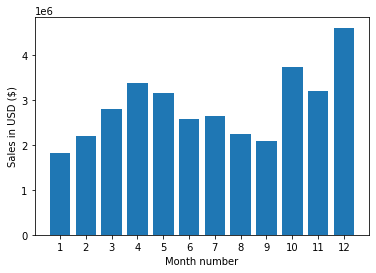

In [47]:
# Let's use a graph representation to interpret the results.

months = range(1,13)

plt.bar(months, results['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show()

#### Most probably because December is associated with Christmas users tend to purchase more for giving away presents, and for this reason we see December month on top with most sales. However, we can see as well that October, April, May, and November have a fairly share of the sales.

**Recommendation** 

    1. Find a strategy to promote sales by lowering price during [January, February and March] in this way we can 
    get rid of items left during Christmas period.
    2. Increase advertisements -> using social media to promote advisertment to reach out to more users.

### What city had the highest number of sales?

In [48]:
# grouping the cities -> allows creating graphs easily when the same datatype is grouped together. 
res = months_data.groupby('City').sum()

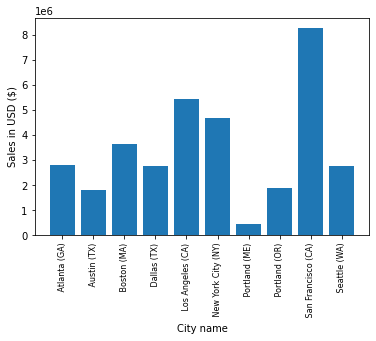

In [49]:
# Let's use a graph representation to interpret the results.

cities = [city for city, months_data in months_data.groupby('City')]

plt.bar(cities, res['Sales'])
plt.xticks(cities, rotation='vertical', size=8)
plt.ylabel('Sales in USD ($)')
plt.xlabel('City name')
plt.show()

#### San Francisco has a significantly the high number of sales compare to other cities. I would recommend looking into the product most sold there and probably increasing inventory.

### What time should we display advertisements to maximize likehood of customer's buying product?

In [50]:
# convert date to daytime 

months_data['Order Date'] = pd.to_datetime(months_data['Order Date'])

In [51]:
months_data['Hour'] = months_data['Order Date'].dt.hour
months_data['Minute'] = months_data['Order Date'].dt.minute

months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,150502,iPhone,1,700.00,2019-02-18 01:35:00,"866 Spruce St, Portland, ME 04101",2,700.00,Portland (ME),1,35
1,150503,AA Batteries (4-pack),1,3.84,2019-02-13 07:24:00,"18 13th St, San Francisco, CA 94016",2,3.84,San Francisco (CA),7,24
2,150504,27in 4K Gaming Monitor,1,389.99,2019-02-18 09:46:00,"52 6th St, New York City, NY 10001",2,389.99,New York City (NY),9,46
3,150505,Lightning Charging Cable,1,14.95,2019-02-02 16:47:00,"129 Cherry St, Atlanta, GA 30301",2,14.95,Atlanta (GA),16,47
4,150506,AA Batteries (4-pack),2,3.84,2019-02-28 20:32:00,"548 Lincoln St, Seattle, WA 98101",2,7.68,Seattle (WA),20,32


In [52]:
result = months_data.groupby(['Hour']).count()

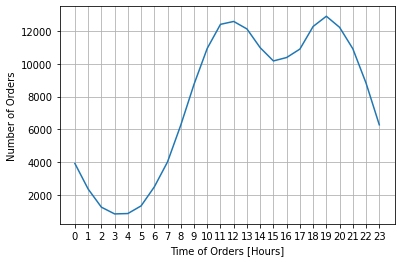

In [53]:
# Let's use a graph representation to interpret the results.
hours = [hour for hour, months_data in months_data.groupby('Hour')]
hours

plt.plot(hours, result['Sales'])
plt.xticks(hours)
plt.xlabel('Time of Orders [Hours]')
plt.ylabel('Number of Orders')
plt.grid()
plt.show()


#### Advisertment recommendation: Advisertment should be placed between 7am to 11pm. 

As per graph representation: We can see Numbers of orders started to raise significally from 7am and decline at 11pm. Reason could be because users are more active during this period, and I believe to be the right period to place advisertments. 

### What products are most often sold together?

In [54]:
# let's find all duplicates order IDs -> making a copy of the dataset (df)

df = months_data[months_data['Order ID'].duplicated(keep=False)]

df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

df = df[['Order ID', 'Grouped']].drop_duplicates()

df.head()

,Order ID,Grouped
16,150518,"Macbook Pro Laptop,iPhone"
82,150582,"iPhone,Lightning Charging Cable"
91,150590,"Apple Airpods Headphones,AAA Batteries (4-pack)"
119,150617,"Google Phone,USB-C Charging Cable"
154,150651,"Google Phone,USB-C Charging Cable"


In [55]:
count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 3)))
    
#print(count)

#count.most_common(10)

for key, value in count.most_common(10):
    print(key, value)

('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 87
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 62
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 47
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 35
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 33
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 27
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 24
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 16
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 5
('Vareebadd Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 5


### What product sold the most? Why do you think it sold the most?

In [56]:
months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,150502,iPhone,1,700.00,2019-02-18 01:35:00,"866 Spruce St, Portland, ME 04101",2,700.00,Portland (ME),1,35
1,150503,AA Batteries (4-pack),1,3.84,2019-02-13 07:24:00,"18 13th St, San Francisco, CA 94016",2,3.84,San Francisco (CA),7,24
2,150504,27in 4K Gaming Monitor,1,389.99,2019-02-18 09:46:00,"52 6th St, New York City, NY 10001",2,389.99,New York City (NY),9,46
3,150505,Lightning Charging Cable,1,14.95,2019-02-02 16:47:00,"129 Cherry St, Atlanta, GA 30301",2,14.95,Atlanta (GA),16,47
4,150506,AA Batteries (4-pack),2,3.84,2019-02-28 20:32:00,"548 Lincoln St, Seattle, WA 98101",2,7.68,Seattle (WA),20,32


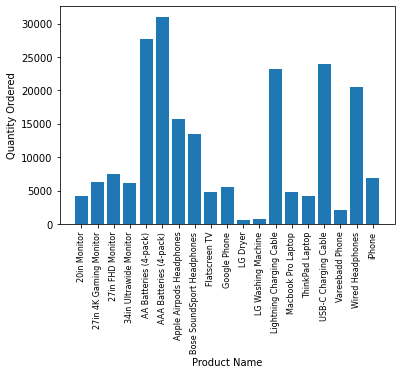

In [61]:
product_group = months_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

products = [product for product, months_data in product_group]
plt.bar(products, quantity_ordered)
plt.xticks(products, rotation='vertical', size=8)
plt.ylabel('Quantity Ordered')
plt.xlabel('Product Name')
plt.show()

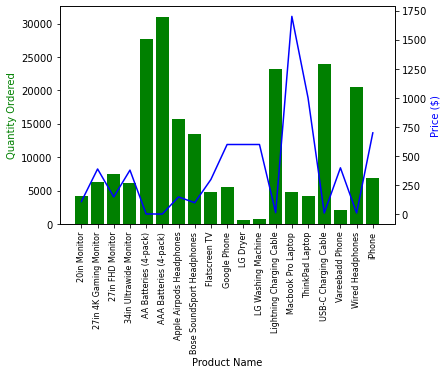

In [58]:
prices = months_data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color='g')
ax2.plot(products, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(products, rotation='vertical', size=8)

plt.show()

In [60]:
# Transpose results as it gives a better representation and easy to read. 

months_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity Ordered,185950.0,1.124383,0.442793,1.00,1.00,1.00,1.0,9.0
Price Each,185950.0,184.399735,332.731330,2.99,11.95,14.95,150.0,1700.0
Month,185950.0,7.059140,3.502996,1.00,4.00,7.00,10.0,12.0
Sales,185950.0,185.490917,332.919771,2.99,11.95,14.95,150.0,3400.0
Hour,185950.0,14.413305,5.423416,0.00,11.00,15.00,19.0,23.0
Minute,185950.0,29.481361,17.317573,0.00,14.00,29.00,45.0,59.0
